# Tutorial Basics Noten Part 1: Einführung und Visualisierung

Inhaltsverzeichnis: 
1. Jupyter-Notebook: Grundlegende Funktionen
2. Laden von Notendateien (MusicXML)
3. Exkurs: Der xml-Parser und das Pandas-Dataframe
4. Pianorollen-Visualisierung
5. Auswahl von Stimmen bzw. Takten
6. Aufgaben

Dieses Tutorial führt in den Aufbau und die Funktionsweise eines Jupyter-Notebooks ein und zeigt Ihnen, wie Sie CAMAT (Computer-Assisted Music Analysis Tool) für die Visualisierung und Analyse von Notendaten nutzen können.

Auf dieser Grundlage präsentiert Ihnen das Tutorial Part 2 Möglichkeiten einfacher statistischer Abfragen. 

### 1. Jupyter-Notebook: Grundlegende Funktionen

Ein Jupyter-Notebook ist eine Datei, die im Browser geöffnet und bearbeitet werden kann. Jedes Jupyter-Notebook besteht aus einer Folge von Textblöcken (Markdown Cells) und Blöcken mit Python-Code (Code Cells). Beide Blöcke können von jedem User verändert und bearbeitet werden. Indem innerhalb eines Blocks die Eingabetaste gedrückt wird, kann Text oder Code geändert, hinzugefügt oder gelöscht werden. 
Eigene, veränderte Versionen des Notebooks können unter neuem Namen abgespeichert werden (Menu: File -> Save as...). 

WICHTIG: Die Befehle jeder einzelnen Code cell werden mit dem Run-Button ausgeführt. Während der Ausführung (die bei manchen Befehlen einige Sekunden dauern kann) wird oben auf dem Tab ein Sanduhr-Symbol angezeigt. Anschließend werden ggf. Ergebnisse (oder Fehlermeldungen) angezeigt und der Cursor springt zur nächsten Box. 
Gehen Sie bitte die Tutorials jeweils Code Cell für Code Cell durch, aktivieren Sie den jeweiligen Code jeweils mit dem Run-Button und warten Sie ab, was geschieht!

In den Code Cells werden alle Zeilen hinter einem Rautezeicheen (#) nicht ausgeführt; dies bietet die Möglichkeit, entweder Erläuterungen zum Code in den Code cells zu vermerken oder zusätzliche deaktivierte Befehle zu notieren, die durch Löschen der Raute (und anschließendem Run) ausgeführt werden. 

In [1]:
# Mit den Befehlen können Sie selbstverständlich auch rechnen. 
 
21 * 7 + 1 
# Drücken Sie bitte auf 'Run'!

# Verändern Sie nun den Rechenbefehl.
# Drücken Sie dann wieder auf 'Run'!

148

Eine neue Cell wird mit dem +-Button oder den Menu-Punkt Insert erzeugt und kann dann im Menu als Markdown oder Code Cell festgelegt werden. Hier können Sie Ihre eigenen Kommentare oder Befehle vermerken. (Und bitte nicht vergessen, das Notebook zuvor unter neuem Namen abzuspeichern!).  

Parallel zum Notebook läuft ein Command-Fenster ("Anaconda Prompt"), das Sie nicht weiter beachten müssen - das Sie aber bitte auch nicht schließen dürfen! Beenden Sie ein Notebook bitte mit dem Menu-Befehl "File" -> "Close and Halt", loggen Sie sich dann aus und schließen Sie erst zum Schluss das Command-Fenster. 

Jeder Start eines Jupyter Notebooks beginnt mit dem Import der erforderlichen Python-Bibliotheken:  

In [2]:
import sys
import os
sys.path.append(os.getcwd().replace(os.path.join('music_xml_parser', 'ipynb'), ''))

import music_xml_parser as mp
from music21 import * 
import csv
from IPython.display import HTML, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mit diesen Befehlen wird der Kern von CAMAT, der 'music_xml_parser', 
# aber u.a. auch die python-Bibliotheken 'numpy' und 'pandas' für statische Auswertungen, 
# 'matplotlib' für grafische Darstellungen, 
# 'csv' für den Tabellenexport geladen 
# sowie 'music21' geladen.

# Durch den folgenden Befehl wird der Download von URLs aus dem Internet erlaubt: 
environment.set('autoDownload', 'allow')

### 2. Laden von Notendateien (MusicXML)

Als nächstes wird eine Notendatei im MusicXML-Format (kurz: xml) geladen und mit dem Namen 'xml_file' versehen. Dabei gibt es zwei Möglichkeiten: 
1. Eine Notendatei wird von der lokalen Festplatte geladen, der zuvor in den Ordner 'data/xmls_to_parse' des 'music_xml_parser' gelegt wurde. Dann muss der Dateiname eingegeben werden (in einfachen Anführungszeichen). 
2. Eine Notendatei wird direkt aus dem Internet geladen, indem der URL eingegeben wird (in einfachen Anführungszeichen). 

Im folgenden Beispiel laden wir den ersten Satz (Adagio) aus dem Streichquartett No. 11 in Es-Dur - Adagio, Köchelverzeichnis 171 von Wolfgang Amadeus Mozart aus der Projektdatenbank (vgl. https://analyse.hfm-weimar.de/doku.php?id=mowo  bzw. https://analyse.hfm-weimar.de/doku.php?id=notenauswahl#mozart_wolfgang_amadeus_1756-1791), in dem wir den Link zur xml-Datei mit einem Rechtsklick und "Link-Adresse kopieren" übernehmen. 

Anschließend wird ein sog. Pandas-Dataframe (s. Abschnitt 3) der xml-Datei generiert, das als eine Art interne Datenbank allen weiteren Auswertungen als Datengrundlage dient. 

### 3. Exkurs: Der xml-Parser und das Pandas-Dataframe

Der **xml-Parser** ist ein im Rahmen des Fellowship-Projekt entwickeltes Python-Modul für die Verarbeitung einer MusicXML-Datei und dient u.a. der Visualizierung und statistischen Auswertung der in der Datei enthaltenen Informationen. Das Grundkonzept des Moduls besteht in der Speicherung der gesamten in der Notendatei vorhandenen Informationen in Form eines [Pandas-Dataframes](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe), welches sehr effiziente Kalkulationen und Datenverwaltung der eingelesen Daten ermöglicht. 

**xml-Parser** (von engl. to parse: zerlegen, analysieren) verfügt über eine intern festgelegte Datenstruktur, die sich nach der Exktraktion der zip-Datei bereits auf Ihrem Rechner wiederfindet (Ordner *music_xml_parser*). Darin gibt es drei Ordner:

1. **core** enthält alle programmrelevanten Python-Scripte. //Bitte nicht verändern!!//

2. **data** enthält die Ordner
- **xmls_to_parse**. Darin liegen alle xml-Files, die beim Laden direkt (also ohne weitere Pfadangabe) eingelesen werden können. Sie können selbst xml-Dateien in den Ordner legen, oder aber Dateien direkt aus dem Internet einlesen.  
- **exports**: Hier liegen alle Dateien, die Sie im Laufe Ihrer Arbeit mit dem Jupyter-Notebooks selbst generiert haben, z.B. Tabellen (.csv) oder Grafiken (.png). 

3. **ipynb** - enthält alle Jupyter-Notebooks (.ipynb); modifizierte Notebooks sollten ebenfalls hier gespeichert werden, gerne auch in Unterordnern. 

Nachdem Sie durch den letzten Befehl ein Dataframe 'm_df' Ihrer Notendatei erzeugt haben, können Sie sich die Daten anschauen, indem Sie im **exports**-Ordner die dort gespeicherte Datei m_df.csv öffnen (mit Excel oder einem Texteditor) - vorausgesetzt, Sie haben 'do_save=True' gewählt. 

Sie können die Daten auch als Tabelle im Browser ausgeben. Dazu aktivieren Sie bitte den folgenden Befehl, indem Sie die Raute (#) davor löschen und anschließend auf 'Run' drücken. 

ACHTUNG: Bei großen Notendateien benötigt diese Darstellung viel Speicherplatz; der Befehl sollte dann übersprungen werden. 

In [3]:
# m_df

# Wenn Sie die Raute (#) löschen und auf Run drücken, 
# wird der Befehl 'm_df' ausgeführt und eine Tabelle 
# mit dem Pandas-Dataframe angezeigt.

### 4. Pianorollen-Visualisierung

Im folgenden Codefenster aktivieren Sie die Pianorollen-Visualisierung der Notendatei.

Dabei gibt es zwei Möglichkeiten: 
1. Im Browser ('inline'): Dies erfordert in Abhängigkeit von der Datengröße viel Speicherplatz und zwingt Ihren Rechner unter Umständen 'in die Knie'! 
2. In einem externen Pop-Up-Fenster des Python-Moduls 'matplotlib': In der Symbolleiste ihres Desktops taucht dann ein neues Icon auf, das Sie anklicken müssen. Sie können dann  Sie anschließend mit Ihrer Mouse in der Grafik navigieren, Ausschnitte auswählen, Vergrößerungen einstellen etc. Mit dem Mouse-Rädchen können Sie die horizontale Ausdehnung der Grafik verändern. Anschließend können Sie die gewählte Darstellung als Bilddatei (.png) abspeichern!

In [4]:
#%matplotlib
# Durch diesen Befehl wird die externe Darstellung gewählt. 
xml_file = 'https://analyse.hfm-weimar.de/database/03/MoWo_K171_COM_1-4_StringQuar_003_00867.xml'


m_df = mp.parse.with_xml_file(file=xml_file, 
                              plot_pianoroll=False, 
                              plot_inline_ipynb=False)

# Zu den Parametern:
# 1. file= -> hier können Sie auch andere Variablennamen einfügen, 
# unter denen Sie Notendateien geladen haben (vgl. oben)
# Voreinstellung: xml_file

# 2. plot_pianoroll=True -> eine Pianorollendarstellung wird erzeugt. 
# bei plot_pianoroll=True wird darauf verzichtet. 

# 3. plot_inline_ipynb=False -> die Pianorolle wird im externen Fenster angezeigt. 
# bei plot_inline_ipynb=True wird im Browser dargestellt. 

# Alternative Möglichkeit der Auswahl externe/interne Darstellung:
# Durch die Aktivierung des Befehls '# %matplotlib'
# (s. oben, Aktivierung = '#'-Zeichen davor löschen)
# wird die Anzeige auf ein externes Pop-Up-Fenster umgestellt. 
# Davon sind auch alle folgenden Grafiken betroffen!
# Wollen Sie auf die Darstellung im Browser zurückschalten, 
# müssen Sie die Raute ('#') vor dem nächsten Befehl löschen:

# %matplotlib inline

# Sie können bei Bedarf weitere Einstellungen. 
# Hier eine Liste aller verfügbarer Einstellungen mit den jeweiligen Standardeinstellungen
# Dabei ist jeweils vermerkt, ob ein String (Zeichenfolge) 
# oder ein Wert (bool: True oder False) eingegeben werden muss:

#file: str, (string value, is mandatory)
#plot_pianoroll: bool = False,
#plot_inline_ipynb: bool=False,
#save_at: str = None,
#save_file_name: str = None,
#do_save: bool = False,
#x_axis_res=2, - Auflösung der X-Achse als Teiler der Viertelnote (2=0.5 Viertelnote)
#get_measure_onset:bool=False, 
#get_upbeat_info=False,
#filter_dict=None

Jede Stimme wird mit einer eigenen Farbe dargestellt. 
Spielen zwei Stimmen unisono (also dieselben Noten), mischen sich die beiden Farben. 

Öffnen Sie nun bitte die Notendatei: Speichern Sie die Datei zunächst auf Ihrer Festplatte (in der Notendatenbank: Rechtsklick auf den Link -> 'Ziel speichern unter'), öffnen Sie Ihren Noteneditor (z.B. MuseScore) und laden Sie die Datei. 

Vergleichen Sie nun die Notendarstellung mit der Pianorollendarstellung. 
Wo unterscheiden sich die beiden Darstellungen?
Was können Sie auf der Pianorollen-Grafik erkennen?
Wo liegen die Vorteile der Pianorolle gegenüber dem Notentext? Welche Nachteile gibt es?


### 5. Auswahl von Stimmen bzw. Takten

Durch den folgenden Befehl können flexibel Stimmen und Takte ausgewählt werden - für grafische Darstellungen oder statistische Abfragen. 

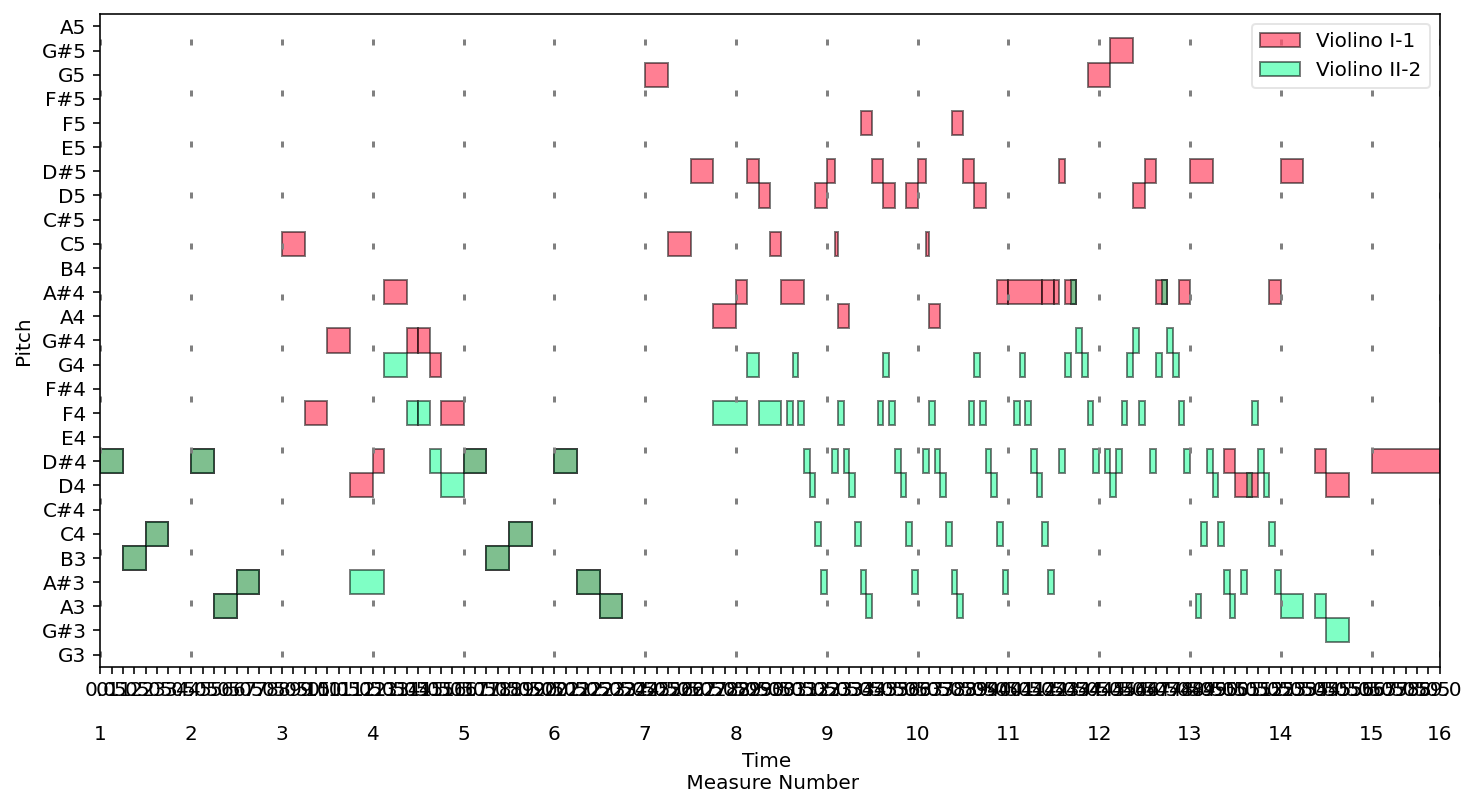

In [6]:
# Zunächst wird ein Filter mit dem Namen 'filter_dict_t' definiert. 
# Dabei können bestimmte Stimmen ('PartID') und bestimmte Takte ('Measures') ausgewählt werden.
# Im folgenden Beispiel werden die ersten beiden Stimmen und die ersten 5 Takte ausgewählt: 

filter_dict_t = {'Measure':'1-16', 'PartID':'1-2'}

# Anschließend wird dem Pianorollenbefehl (s. oben) der Filter als weiterer Parameter hinzugefügt:
# filter_dict=filter_dict_t

m_df_2 = mp.parse.with_xml_file(file=xml_file,
                                plot_pianoroll=True,
                                plot_inline_ipynb=True,
                                filter_dict=filter_dict_t)

# Sie können die Auswahl beliebig verändern!!
# Sie können anderen Filtern andere Filternamen geben, 
# müssen dann aber den neuen Filter in die letzte Zeile einfügen: 
# filter_dict= [Name]

Bei diesem Ausschnitt sehen Sie, wie zu Beginn die beiden Violinen unisono spielen (Takt 1 und 2, graugrün), dann eigene Stimmen (Takt 3/4) und in Takt 5 wieder unisono. 

**Aufgaben**: 
Wählen Sie anhand der Partitur verschiedene Abschnitte der Komposition, schreiben Sie entsprechende Filter und visualisieren Sie die Abschnitte mit eigenen Pianorollen-Darstellungen. 
Vergleichen Sie den Verlauf der vier Stimmen, indem Sie für jede Stimme eine eigene Pianorollen-Darstellung generieren. 
Vergleichen 

### 6. Vertiefung

Generieren Sie Pianorollendarstellungen von anderen Kompositionen und machen Sie sich auf diese Weise mit dem Jupyter-Notebook vertraut. 